In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

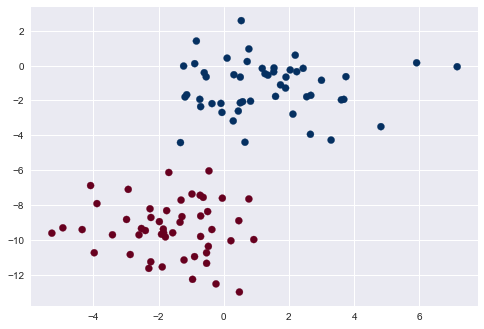

In [2]:
from sklearn.datasets import make_blobs
X,y = make_blobs(100,2,centers=2,random_state=2,cluster_std=1.5)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='RdBu')

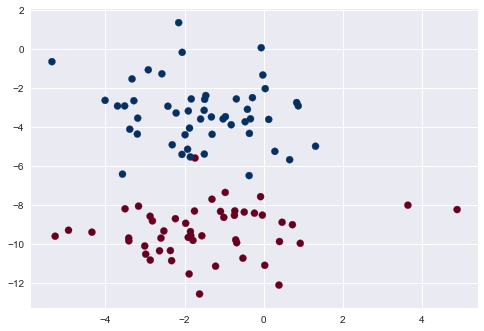

In [3]:
X,y = make_blobs(100,4,centers=2,random_state=2,cluster_std=1.5)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='RdBu')

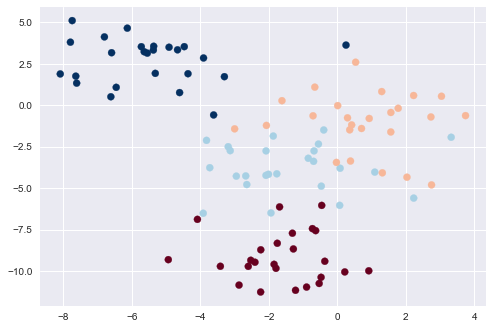

In [4]:
X,y = make_blobs(100,2,centers=4,random_state=2,cluster_std=1.5)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='RdBu')

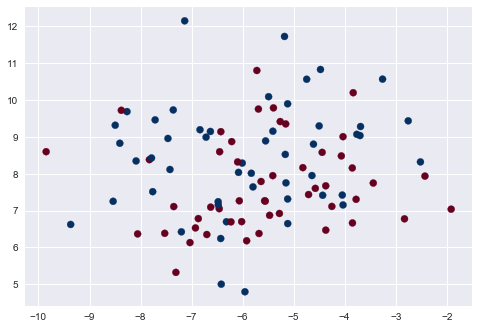

In [5]:
X,y = make_blobs(100,2,centers=2,random_state=5,cluster_std=1.5)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='RdBu')

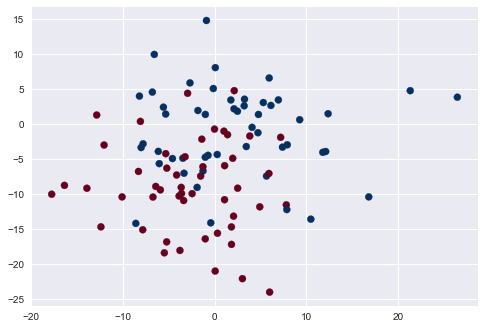

In [6]:
X,y = make_blobs(100,2,centers=2,random_state=2,cluster_std=6.2)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='RdBu')

In [7]:
help(make_blobs)

Help on function make_blobs in module sklearn.datasets.samples_generator:

make_blobs(n_samples=100, n_features=2, centers=3, cluster_std=1.0, center_box=(-10.0, 10.0), shuffle=True, random_state=None)
    Generate isotropic Gaussian blobs for clustering.
    
    Read more in the :ref:`User Guide <sample_generators>`.
    
    Parameters
    ----------
    n_samples : int, optional (default=100)
        The total number of points equally divided among clusters.
    
    n_features : int, optional (default=2)
        The number of features for each sample.
    
    centers : int or array of shape [n_centers, n_features], optional
        (default=3)
        The number of centers to generate, or the fixed center locations.
    
    cluster_std : float or sequence of floats, optional (default=1.0)
        The standard deviation of the clusters.
    
    center_box : pair of floats (min, max), optional (default=(-10.0, 10.0))
        The bounding box for each cluster center when centers a

In [8]:
X

array([[  7.81950171e+00,  -1.15626749e+01],
       [ -1.77686886e+01,  -1.00484816e+01],
       [  2.13891312e+00,   4.73021432e+00],
       [ -3.46612426e+00,  -4.91072263e+00],
       [  3.21987621e+00,   2.56421442e+00],
       [  1.01665417e+00,  -1.05174541e+00],
       [  1.83776283e+00,  -1.72022615e+01],
       [ -8.19803640e+00,   3.95358158e+00],
       [ -5.33025362e+00,  -4.25824642e+00],
       [  7.19675767e+00,  -1.93058444e+00],
       [  4.77614289e+00,   1.33212864e+00],
       [  9.27375980e+00,   5.82749737e-01],
       [ -3.22385278e+00,  -4.70120259e+00],
       [  2.11179036e+00,   2.13606635e+00],
       [ -8.09228343e+00,   3.42344386e-01],
       [ -8.01760941e+00,  -3.38926237e+00],
       [  1.08746869e+00,  -5.97056763e+00],
       [ -5.58370447e+00,   2.37478028e+00],
       [ -1.20554509e+01,  -3.02836685e+00],
       [  1.97053591e+00,  -4.92274199e+00],
       [ -1.40124879e-02,  -7.59958665e-01],
       [ -1.42941200e-01,   5.02954717e+00],
       [  

# Gaussian Naive bayes

In [9]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X,y)

GaussianNB(priors=None)

In [11]:
rng = np.random.RandomState(0)
d = rng.rand(2000, 2) * [14,18] 
d

array([[  7.68338905,  12.87340859],
       [  8.43868727,   9.80789729],
       [  5.93116719,  11.62609404],
       ..., 
       [  1.67865468,   6.29350861],
       [  6.08823081,  14.94005305],
       [ 13.05928655,   5.55009182]])

In [12]:
d.shape

(2000, 2)

In [13]:
Xnew = [-6, -14] + [14, 18] * rng.rand(2000, 2)
ynew = model.predict(Xnew)

In [14]:
ynew

array([0, 0, 0, ..., 1, 1, 1])

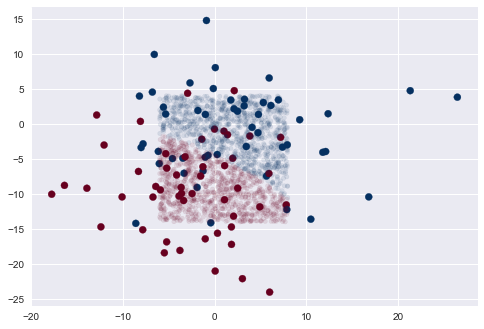

In [25]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
lim = plt.axis()
plt.scatter(Xnew[:, 0], Xnew[:, 1], c=ynew, s=20, cmap='RdBu', alpha=0.1)
plt.axis(lim);

# Text Classification

* They are extremely fast for both training and prediction
* They provide straightforward probabilistic prediction
* They are often very easily interpretable
* They have very few (if any) tunable parameters

In [26]:
from sklearn.datasets import fetch_20newsgroups
data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [27]:
### This example is used to classify a particular keyword into a topic by using the naive bayes classification

categories = ['talk.religion.misc', 'soc.religion.christian',
              'sci.space', 'comp.graphics']
train = fetch_20newsgroups(subset='train',categories=categories)  ## here the subset creates a subset for the purpose of trainingfrom categories

test = fetch_20newsgroups(subset='test',categories=categories)

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

In [29]:
model = make_pipeline(TfidfVectorizer(),MultinomialNB())
model.fit(train.data,train.target)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_i...   vocabulary=None)), ('multinomialnb', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [30]:
model.predict(['Jesus'])

array([2], dtype=int64)

In [31]:
train.target_names[ model.predict(['Jesus'])[0]]

'soc.religion.christian'

In [32]:
test.target_names[ model.predict(['Jesus'])[0]]

'soc.religion.christian'

In [35]:
train.target_names[ model.predict(['Jesus'])[1]]

IndexError: index 1 is out of bounds for axis 0 with size 1

In [36]:
train.target_names[ model.predict(['Jesus'])

SyntaxError: unexpected EOF while parsing (<ipython-input-36-72f7507ceb78>, line 1)

In [38]:
train.target_names[ model.predict(['Is earth round or spherical ?'])[0]]

'sci.space'

In [39]:
train.target_names[ model.predict(['Nvidia card'])[0]]

'comp.graphics'

In [40]:
train.target_names[ model.predict(['Theist v/s Atheist'])[0]]

'soc.religion.christian'

In [41]:
### Also , we could do this as a function

def predict_category(s, train=train, model=model):
    pred = model.predict([s])
    return train.target_names[pred[0]]

In [42]:
predict_category('Is pluto a planet ?')

'sci.space'

In [43]:
predict_category('Hindutva , Jupiter, Qualcomm')

'sci.space'